In [2]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [20]:
import pandas as pd
url = 'https://raw.githubusercontent.com/safdhar-ali/electricity-forecasting/master/weather_daily_darksky.csv'
df = pd.read_csv(url)

In [21]:
df.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,apparentTemperatureHigh,precipType,visibility,humidity,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureMax,uvIndex,time,sunsetTime,temperatureLow,temperatureMin,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,10.87,rain,3.30,0.95,2011-11-11 19:00:00,10.87,11.96,1.0,2011-11-11 00:00:00,2011-11-11 16:19:21,10.87,8.85,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,5.62,rain,12.09,0.88,2011-12-11 19:00:00,-0.64,5.72,1.0,2011-12-11 00:00:00,2011-12-11 15:52:53,3.09,2.48,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,10.33,rain,13.39,0.74,2011-12-27 14:00:00,5.52,10.33,0.0,2011-12-27 00:00:00,2011-12-27 15:57:56,8.03,8.03,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,5.33,rain,11.89,0.87,2011-12-02 12:00:00,3.26,5.33,1.0,2011-12-02 00:00:00,2011-12-02 15:56:17,6.33,2.56,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,5.02,rain,13.16,0.80,2011-12-24 15:00:00,4.37,5.32,1.0,2011-12-24 00:00:00,2011-12-24 15:55:55,7.45,3.17,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


In [22]:
df.to_csv('/content/drive/MyDrive/weather_data.csv')

In [23]:
df.info

<bound method DataFrame.info of      temperatureMax   temperatureMaxTime  ...  apparentTemperatureLowTime moonPhase
0             11.96  2011-11-11 23:00:00  ...         2011-11-11 19:00:00      0.52
1              8.59  2011-12-11 14:00:00  ...         2011-12-12 08:00:00      0.53
2             10.33  2011-12-27 02:00:00  ...         2011-12-28 00:00:00      0.10
3              8.07  2011-12-02 23:00:00  ...         2011-12-02 19:00:00      0.25
4              8.22  2011-12-24 23:00:00  ...         2011-12-24 20:00:00      0.99
..              ...                  ...  ...                         ...       ...
877            9.03  2014-01-26 16:00:00  ...         2014-01-27 04:00:00      0.84
878           10.31  2014-02-27 14:00:00  ...         2014-02-28 02:00:00      0.93
879           18.97  2014-03-09 14:00:00  ...         2014-03-10 06:00:00      0.28
880            8.83  2014-02-12 16:00:00  ...         2014-02-13 02:00:00      0.42
881            9.90  2014-02-15 12:00:00  ..

In [24]:
df.dtypes

temperatureMax                 float64
temperatureMaxTime              object
windBearing                      int64
icon                            object
dewPoint                       float64
temperatureMinTime              object
cloudCover                     float64
windSpeed                      float64
pressure                       float64
apparentTemperatureMinTime      object
apparentTemperatureHigh        float64
precipType                      object
visibility                     float64
humidity                       float64
apparentTemperatureHighTime     object
apparentTemperatureLow         float64
apparentTemperatureMax         float64
uvIndex                        float64
time                            object
sunsetTime                      object
temperatureLow                 float64
temperatureMin                 float64
temperatureHigh                float64
sunriseTime                     object
temperatureHighTime             object
uvIndexTime              

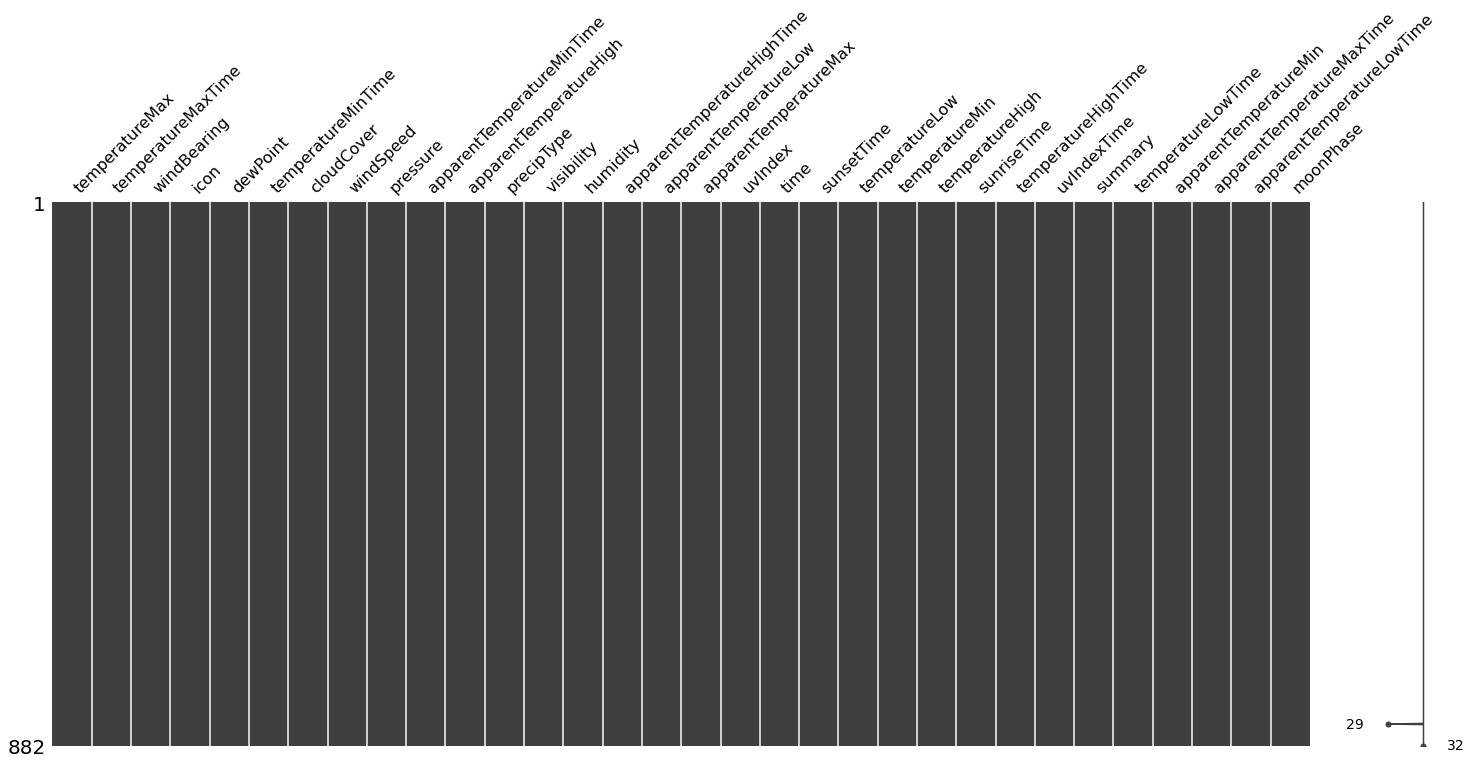

In [25]:
import matplotlib.pyplot as plt
import missingno as msno
msno.matrix(df)
plt.show()


**Change string format of few column values to dateTime format**

In [27]:
clmn_list=['apparentTemperatureLowTime','apparentTemperatureMaxTime','temperatureLowTime','uvIndexTime','temperatureHighTime','sunriseTime','sunsetTime','time','temperatureMaxTime','temperatureMinTime','apparentTemperatureMinTime','apparentTemperatureHighTime']
for i in clmn_list:
  df[i] =  pd.to_datetime(df[i], format='%Y-%m-%d %H:%M:%S')


In [28]:
df.dtypes

temperatureMax                        float64
temperatureMaxTime             datetime64[ns]
windBearing                             int64
icon                                   object
dewPoint                              float64
temperatureMinTime             datetime64[ns]
cloudCover                            float64
windSpeed                             float64
pressure                              float64
apparentTemperatureMinTime     datetime64[ns]
apparentTemperatureHigh               float64
precipType                             object
visibility                            float64
humidity                              float64
apparentTemperatureHighTime    datetime64[ns]
apparentTemperatureLow                float64
apparentTemperatureMax                float64
uvIndex                               float64
time                           datetime64[ns]
sunsetTime                     datetime64[ns]
temperatureLow                        float64
temperatureMin                    

In [29]:
df['summary'].nunique()

88

 Numerical Data from the main Weather data 

In [30]:
weather_num = df[['temperatureMax', 'windBearing', 'dewPoint', 'cloudCover', 'windSpeed',
       'pressure', 'apparentTemperatureHigh', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase']]
weather_num.head()

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
0,11.96,123,9.40,0.79,3.88,1016.08,10.87,3.30,0.95,10.87,11.96,1.0,10.87,8.85,10.87,6.48,0.52
1,8.59,198,4.49,0.56,3.94,1007.71,5.62,12.09,0.88,-0.64,5.72,1.0,3.09,2.48,8.59,0.11,0.53
2,10.33,225,5.47,0.85,3.54,1032.76,10.33,13.39,0.74,5.52,10.33,0.0,8.03,8.03,10.33,5.59,0.10
3,8.07,232,3.69,0.32,3.00,1012.12,5.33,11.89,0.87,3.26,5.33,1.0,6.33,2.56,7.36,0.46,0.25
4,8.22,252,2.79,0.37,4.46,1028.17,5.02,13.16,0.80,4.37,5.32,1.0,7.45,3.17,7.93,-0.51,0.99


Dropping NULL values

In [31]:
weather_num = weather_num.dropna()

In [32]:
weather_num.dtypes

temperatureMax             float64
windBearing                  int64
dewPoint                   float64
cloudCover                 float64
windSpeed                  float64
pressure                   float64
apparentTemperatureHigh    float64
visibility                 float64
humidity                   float64
apparentTemperatureLow     float64
apparentTemperatureMax     float64
uvIndex                    float64
temperatureLow             float64
temperatureMin             float64
temperatureHigh            float64
apparentTemperatureMin     float64
moonPhase                  float64
dtype: object

Correlation between Numerical columns data

In [33]:
print(weather_num.corr())

                         temperatureMax  ...  moonPhase
temperatureMax                 1.000000  ...   0.000866
windBearing                    0.066226  ...   0.023196
dewPoint                       0.854893  ...  -0.010082
cloudCover                    -0.332584  ...  -0.054542
windSpeed                     -0.147009  ...  -0.021989
pressure                       0.122966  ...   0.044341
apparentTemperatureHigh        0.985890  ...   0.004326
visibility                     0.246552  ...   0.029688
humidity                      -0.399969  ...  -0.009161
apparentTemperatureLow         0.888008  ...   0.003173
apparentTemperatureMax         0.989423  ...  -0.001005
uvIndex                        0.689206  ...   0.017946
temperatureLow                 0.874488  ...  -0.002312
temperatureMin                 0.888572  ...  -0.014235
temperatureHigh                0.997844  ...   0.003987
apparentTemperatureMin         0.904286  ...  -0.006440
moonPhase                      0.000866  ...   1

In [39]:
# Vizualization of correlation between columns
weather_num.corr().style.background_gradient(cmap='coolwarm')


,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
temperatureMax,1.000000,0.066226,0.854893,-0.332584,-0.147009,0.122966,0.985890,0.246552,-0.399969,0.888008,0.989423,0.689206,0.874488,0.888572,0.997844,0.904286,0.000866
windBearing,0.066226,1.000000,0.087704,-0.083740,0.078558,-0.030625,0.073090,0.276157,0.001558,0.044036,0.074993,-0.074733,0.048834,0.065370,0.061725,0.052124,0.023196
dewPoint,0.854893,0.087704,1.000000,-0.003382,-0.090370,-0.026797,0.859903,0.021173,0.079938,0.893000,0.864330,0.464695,0.890032,0.937326,0.851468,0.939583,-0.010082
cloudCover,-0.332584,-0.083740,-0.003382,1.000000,0.165238,-0.101524,-0.311122,-0.316673,0.492810,-0.121216,-0.306005,-0.254932,-0.088226,-0.042756,-0.335188,-0.084468,-0.054542
windSpeed,-0.147009,0.078558,-0.090370,0.165238,1.000000,-0.333642,-0.180291,0.290737,-0.056839,-0.138893,-0.167655,-0.138763,-0.063420,-0.015369,-0.155407,-0.128914,-0.021989
pressure,0.122966,-0.030625,-0.026797,-0.101524,-0.333642,1.000000,0.142983,-0.038472,-0.240828,0.097692,0.130172,0.097789,0.059160,0.006636,0.133804,0.057228,0.044341
apparentTemperatureHigh,0.985890,0.073090,0.859903,-0.311122,-0.180291,0.142983,1.000000,0.215557,-0.361853,0.888172,0.994971,0.674402,0.866151,0.882092,0.989197,0.906414,0.004326
visibility,0.246552,0.276157,0.021173,-0.316673,0.290737,-0.038472,0.215557,1.000000,-0.579350,0.140181,0.214508,0.250619,0.154965,0.172932,0.245663,0.130531,0.029688
humidity,-0.399969,0.001558,0.079938,0.492810,-0.056839,-0.240828,-0.361853,-0.579350,1.000000,-0.161737,-0.356773,-0.539316,-0.151515,-0.182868,-0.404803,-0.175450,-0.009161
apparentTemperatureLow,0.888008,0.044036,0.893000,-0.121216,-0.138893,0.097692,0.888172,0.140181,-0.161737,1.000000,0.888829,0.588342,0.981858,0.886959,0.887194,0.906058,0.003173


Block Dataset

In [40]:
df_block = pd.read_csv("https://raw.githubusercontent.com/safdhar-ali/electricity-forecasting/master/hhblock_dataset/block_0.csv")
df_block.head()

,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,hh_8,hh_9,hh_10,hh_11,hh_12,hh_13,hh_14,hh_15,hh_16,hh_17,hh_18,hh_19,hh_20,hh_21,hh_22,hh_23,hh_24,hh_25,hh_26,hh_27,hh_28,hh_29,hh_30,hh_31,hh_32,hh_33,hh_34,hh_35,hh_36,hh_37,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
0,MAC000002,13-10-2012,0.263,0.269,0.275,0.256,0.211,0.136,0.161,0.119,0.167,0.109,0.168,0.107,0.166,0.117,0.157,0.126,0.146,0.106,0.135,0.191,0.915,0.933,0.122,0.138,0.076,0.133,0.076,0.133,0.085,0.263,0.134,0.235,0.124,0.184,0.230,0.176,0.388,0.260,0.918,0.278,0.267,0.239,0.230,0.233,0.235,0.188,0.259,0.250
1,MAC000002,14-10-2012,0.262,0.166,0.226,0.088,0.126,0.082,0.123,0.083,0.120,0.079,0.121,0.075,0.124,0.073,0.125,0.070,0.130,0.108,0.196,0.346,0.524,0.076,0.129,0.667,0.230,0.220,0.163,0.091,0.170,0.110,0.110,0.121,0.099,0.157,0.093,0.371,0.386,1.085,1.075,0.956,0.821,0.745,0.712,0.511,0.231,0.210,0.278,0.159
2,MAC000002,15-10-2012,0.192,0.097,0.141,0.083,0.132,0.070,0.130,0.074,0.124,0.078,0.118,0.082,0.112,0.087,0.106,0.140,0.120,1.075,0.146,0.123,0.082,0.127,0.077,0.551,0.149,0.129,0.075,0.130,0.075,0.129,0.075,0.128,0.166,0.194,0.695,0.260,0.227,0.255,1.164,0.249,0.225,0.258,0.260,0.334,0.299,0.236,0.241,0.237
3,MAC000002,16-10-2012,0.237,0.237,0.193,0.118,0.098,0.107,0.094,0.109,0.091,0.105,0.091,0.104,0.092,0.103,0.093,0.101,0.144,0.100,0.408,0.102,0.100,0.116,0.354,0.146,0.190,0.991,0.310,0.121,0.113,0.094,0.119,0.087,0.130,0.238,0.204,0.284,0.447,0.266,0.966,0.172,0.192,0.228,0.203,0.211,0.188,0.213,0.157,0.202
4,MAC000002,17-10-2012,0.157,0.211,0.155,0.169,0.101,0.117,0.084,0.118,0.080,0.119,0.075,0.123,0.071,0.126,0.067,0.124,0.118,0.132,0.358,0.628,0.784,0.681,0.749,0.593,0.502,0.115,0.113,0.092,0.124,0.084,0.125,0.078,0.136,0.227,0.207,0.141,0.258,0.217,0.223,0.075,0.230,0.208,0.265,0.377,0.327,0.277,0.288,0.256


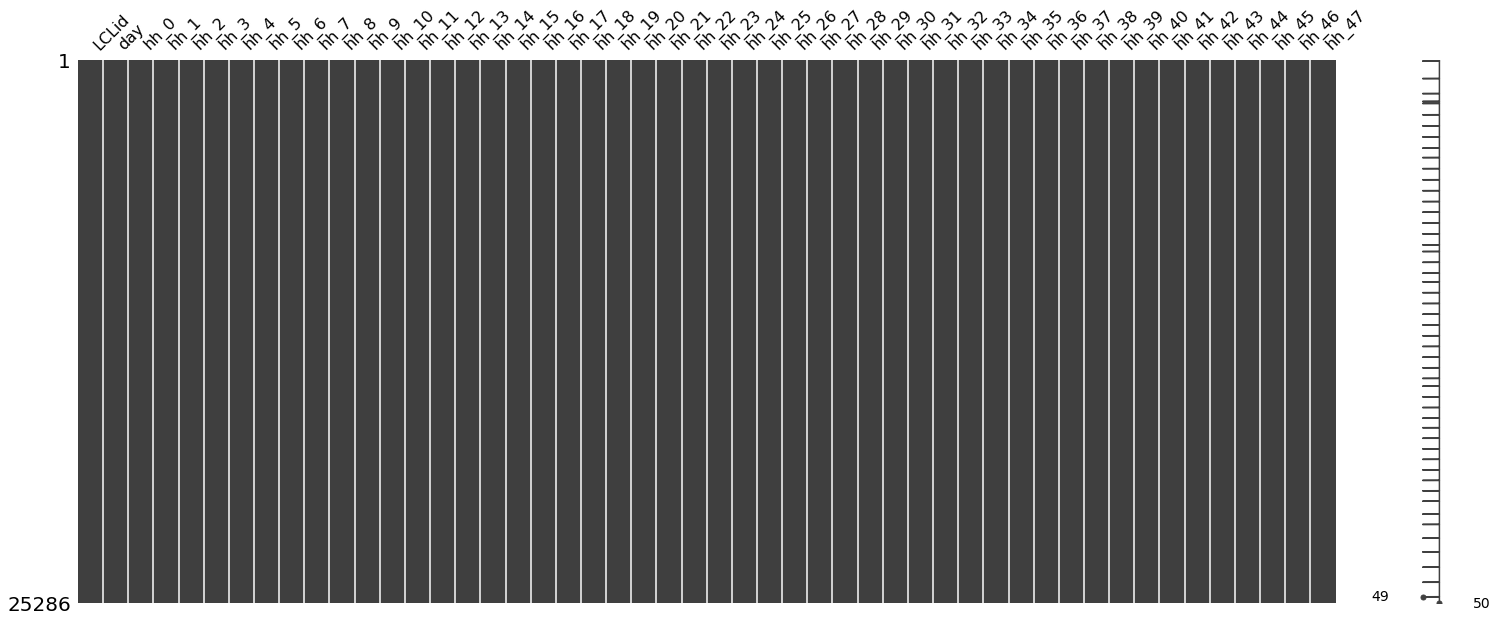

In [41]:
msno.matrix(df_block)

In [49]:
df_counts=pd.DataFrame(df_block['LCLid'].value_counts())
df_counts.head()

,LCLid
MAC000246,814
MAC004387,708
MAC004431,697
MAC004179,646
MAC004319,642


House Hold with maximum records 'MAC000246'

In [50]:
max_hh='MAC000246'
hh_data = df_block[df_block['LCLid'] == max_hh]

In [51]:
hh_data.head(2)

,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,hh_8,hh_9,hh_10,hh_11,hh_12,hh_13,hh_14,hh_15,hh_16,hh_17,hh_18,hh_19,hh_20,hh_21,hh_22,hh_23,hh_24,hh_25,hh_26,hh_27,hh_28,hh_29,hh_30,hh_31,hh_32,hh_33,hh_34,hh_35,hh_36,hh_37,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
498,MAC000246,04-12-2011,0.175,0.098,0.144,0.065,0.071,0.037,0.047,0.042,0.052,0.078,0.039,0.050,0.026,0.091,0.095,0.096,0.658,0.459,0.801,0.933,1.213,0.175,0.179,0.989,1.914,1.421,1.535,0.634,1.219,0.821,0.233,0.132,0.128,0.118,0.077,0.095,0.081,0.097,0.134,0.314,0.822,0.226,0.190,1.054,1.116,0.936,0.478,0.375
499,MAC000246,05-12-2011,0.471,0.934,0.326,0.143,0.130,0.109,0.123,0.088,0.092,0.090,0.118,0.098,0.087,0.094,0.080,0.288,0.354,0.239,0.025,0.039,0.035,0.031,0.079,0.041,0.047,0.031,0.073,0.061,0.077,0.077,0.036,0.054,0.053,0.056,0.113,0.052,0.049,0.070,0.036,0.127,0.074,0.060,0.054,0.050,0.066,0.079,0.164,0.347


In [52]:
hh_data['overall_consumption'] = hh_data.sum(axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
hh_data.head(3)

,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,hh_8,hh_9,hh_10,hh_11,hh_12,hh_13,hh_14,hh_15,hh_16,hh_17,hh_18,hh_19,hh_20,hh_21,hh_22,hh_23,hh_24,hh_25,hh_26,hh_27,hh_28,hh_29,hh_30,hh_31,hh_32,hh_33,hh_34,hh_35,hh_36,hh_37,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47,overall_consumption
498,MAC000246,04-12-2011,0.175,0.098,0.144,0.065,0.071,0.037,0.047,0.042,0.052,0.078,0.039,0.050,0.026,0.091,0.095,0.096,0.658,0.459,0.801,0.933,1.213,0.175,0.179,0.989,1.914,1.421,1.535,0.634,1.219,0.821,0.233,0.132,0.128,0.118,0.077,0.095,0.081,0.097,0.134,0.314,0.822,0.226,0.190,1.054,1.116,0.936,0.478,0.375,20.763
499,MAC000246,05-12-2011,0.471,0.934,0.326,0.143,0.130,0.109,0.123,0.088,0.092,0.090,0.118,0.098,0.087,0.094,0.080,0.288,0.354,0.239,0.025,0.039,0.035,0.031,0.079,0.041,0.047,0.031,0.073,0.061,0.077,0.077,0.036,0.054,0.053,0.056,0.113,0.052,0.049,0.070,0.036,0.127,0.074,0.060,0.054,0.050,0.066,0.079,0.164,0.347,6.020
500,MAC000246,06-12-2011,0.303,1.216,0.914,0.467,0.660,0.705,0.154,0.108,0.127,0.084,0.089,0.099,0.096,0.149,0.095,0.118,0.110,0.507,0.279,0.216,0.470,0.127,0.153,0.163,0.411,0.077,0.051,0.053,0.027,0.061,0.054,0.075,0.076,0.047,0.055,0.064,0.054,0.100,0.048,0.062,0.057,0.101,0.597,0.344,1.042,0.948,0.523,0.986,13.322


In [54]:
hh_data['overall_consumption']

498     20.763
499      6.020
500     13.322
501      9.062
502     13.664
         ...  
1307    29.716
1308    18.935
1309    23.717
1310    15.562
1311    16.026
Name: overall_consumption, Length: 814, dtype: float64